### Local color propogation

In [1]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import numpy as np

# from resent import resnet101
# from skimage.transform import resize
# from skimage import io, img_as_float
# from tqdm import tqdm


# class NewSepConv(nn.Module):
#     def __init__(self):
#         super(NewSepConv, self).__init__()
       
#     def forward(self, imgs, vers, hors):
#         b, c, H, W = imgs.size()
#         _, s, _, _ = vers.size()
        
#         all_kernels = vers.permute(0,2,3,1).contiguous().view(b, H, W, s, 1) @ hors.permute(0,2,3,1).contiguous().view(b, H, W, 1, s)
#         all_kernels = all_kernels.view(b, 1, H, W, s, s)
#         imgs = torch.nn.ReplicationPad2d([8,8,8,8]) (imgs)
#         all_patches = []
#         for i in range(H):
#             for j in range(W):
#                 all_patches.append(imgs[:,:,i:i+17, j:j+17].contiguous().view(b, c, 17, 17, 1))
#         all_patches = torch.cat(all_patches, dim=-1).view(b, c, 17, 17, H, W).permute(0,1,4,5,2,3).contiguous()
#         #print (124,all_patches.size(), all_kernels.size())
#         return (all_patches * all_kernels).sum(dim=-1).sum(dim=-1)

In [2]:
# class TripleConv(nn.Module):
#     def __init__(self, in_channels, out_channels):
#         super().__init__()
#         self.conv_layers = nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, 3,padding=1),
#             nn.ReLU(),
#             nn.Conv2d(out_channels, out_channels, 3,padding=1),
#             nn.ReLU(),
#             nn.Conv2d(out_channels, out_channels, 3,padding=1),
#             nn.ReLU(),
#         )
#     def forward(self, x):
#         return self.conv_layers(x)


# class LocalTransferNet(nn.Module):
#     def __init__(self):

#         super().__init__()
        
#         self.conv_32 = TripleConv(6, 32) #/1
#         self.conv_down_32_64 = nn.Sequential(nn.AvgPool2d(2), TripleConv(32, 64)) #/2
#         self.conv_down_64_128 = nn.Sequential(nn.AvgPool2d(2), TripleConv(64, 128)) #/4
#         self.conv_down_128_256 = nn.Sequential(nn.AvgPool2d(2), TripleConv(128, 256)) #/8
#         self.conv_down_256_512 = nn.Sequential(nn.AvgPool2d(2), TripleConv(256, 512)) #/16
#         self.conv_down_512_512 = nn.Sequential(nn.AvgPool2d(2), TripleConv(512, 512)) #/32
        
#         self.upsample = nn.Upsample(scale_factor=2) #/16
#         self.conv_up_512_256 = nn.Sequential(TripleConv(512, 256), nn.Upsample(scale_factor=2)) #/8
#         self.conv_up_256_128 = nn.Sequential(TripleConv(256, 128), nn.Upsample(scale_factor=2)) #/4
#         self.conv_up_128_64 = nn.Sequential(TripleConv(128, 64), nn.Upsample(scale_factor=2)) #/2
        
#         self.image1_h_filter = nn.Sequential(TripleConv(64, 17), nn.Upsample(scale_factor=2)) #/1
#         self.image1_w_filter = nn.Sequential(TripleConv(64, 17), nn.Upsample(scale_factor=2)) #/1
#         self.image2_h_filter = nn.Sequential(TripleConv(64, 17), nn.Upsample(scale_factor=2)) #/1
#         self.image2_w_filter = nn.Sequential(TripleConv(64, 17), nn.Upsample(scale_factor=2)) #/1
        
#         self.image1_sepconv = NewSepConv()
#         self.image2_sepconv = NewSepConv()
        
#     def forward(self, G_prev, G_cur, I_prev):
        
#         x = self.conv_32(torch.cat((G_prev, G_cur), dim=1))
        
        
#         x_down_32_64 = self.conv_down_32_64(x) #/2
#         x_down_64_128 = self.conv_down_64_128(x_down_32_64) #/4
#         x_down_128_256 = self.conv_down_128_256(x_down_64_128) #/8
#         x_down_256_512 = self.conv_down_256_512(x_down_128_256) #/16
#         x_down_512_512 = self.conv_down_512_512(x_down_256_512) #/32
        
#         x_bottle = self.upsample(x_down_512_512) #/16
        
#         x_up = x_bottle + x_down_256_512  
#         x_up_512_256 = self.conv_up_512_256(x_up) + x_down_128_256 #/8
#         x_up_256_128 = self.conv_up_256_128(x_up_512_256) + x_down_64_128 #/4
#         x_up_128_64 = self.conv_up_128_64(x_up_256_128) + x_down_32_64 #/2
        
#         image1_kh = self.image1_h_filter(x_up_128_64)
#         image1_kw = self.image1_w_filter(x_up_128_64)
        
#         image2_kh = self.image2_h_filter(x_up_128_64)
#         image2_kw = self.image2_w_filter(x_up_128_64)
        
#         image1_sepconv_proceed = self.image1_sepconv(I_prev, image1_kh, image1_kw)
#         image2_sepconv_proceed = self.image2_sepconv(I_prev, image2_kh, image2_kw)
        

#         return image1_sepconv_proceed + image2_sepconv_proceed
    
    

# class RefinementNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv_layers = nn.Sequential(
#             nn.Conv2d(9, 64, 3, padding=1, dilation=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, 3, padding=2, dilation=2),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, 3, padding=4, dilation=4),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, 3, padding=1, dilation=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, 3, padding=1, dilation=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 3, 3, padding=1, dilation=1),
#         )
#     def forward(self, x):
#         return self.conv_layers(x)


In [1]:
from models import LocalTransferNet

local_transferer = LocalTransferNet()

In [2]:
import torch
gk_1 = torch.randn(2, 3, 128, 128)
gk = torch.randn(2, 3, 128, 128)
Ik_1 = torch.randn(2, 3, 128, 128)
local_transferer(gk_1, gk, Ik_1).shape

/usr/local/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


torch.Size([2, 3, 128, 128])

## Global color propogation

In [1]:
import numpy as np
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = (0.2989 * r + 0.5870 * g + 0.1140 * b)[..., None]
    return np.repeat(gray, 3, 2)

def downscale_img(img, downscale_times=2):
    h, w = img.shape[:2]
    new_h, new_w = h // downscale_times, w // downscale_times
    return resize(img, (new_h, new_w))


In [2]:
from skimage import img_as_float, io
from skimage.transform import resize

k = 40
I1 = img_as_float(io.imread("datasets/DAVIS/JPEGImages/480p/blackswan/00001.jpg"))
Ik = img_as_float(io.imread("datasets/DAVIS/JPEGImages/480p/blackswan/%05d.jpg" % (k)))

I1 = downscale_img(I1, 1.5)
Ik = downscale_img(Ik, 1.5)

/usr/local/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [12]:
start_row = 20
start_col = 100
I1_256 = I1[start_row:start_row + 256, start_col : start_col + 256]
Ik_256 = Ik[start_row:start_row + 256, start_col : start_col + 256]

In [13]:
# class ResNet101Extractor:
#     def __init__(self):
#         self.net = resnet101(pretrained=True)
    
#     def get_features(self, img):
#         tensor = torch.Tensor(img.transpose(2, 0, 1)[None, ...])
#         x = self.net.conv1(tensor)
#         x = self.net.bn1(x)
#         x = self.net.relu(x)
#         x_fine = self.net.layer1(x)
#         x = self.net.layer2(x_fine)
#         x_coarse = self.net.layer3(x)
#         return (x_fine[0].cpu().detach().numpy().transpose(1, 2, 0).astype(np.double),
#                 x_coarse[0].cpu().detach().numpy().transpose(1, 2, 0).astype(np.double))  
    

In [14]:
# class GlobalTransferer:
#     def __init__(self, downscale_coef=4):
#         self.downscale_coef = downscale_coef
#         self.feature_extractor_net = ResNet101Extractor()
    
#     def get_coarse_match(self, F_G1, F_Gk):
#         closest = torch.zeros(F_G1.shape[0], F_G1.shape[1], 2)
#         F_G1_tensor = torch.Tensor(F_G1.transpose(2, 0, 1))[None, ...]
#         F_Gk_tensor = torch.Tensor(F_Gk)

#         f2_g1 = torch.sum(F_G1_tensor ** 2, 1)[:, ...]
#         f2_gk = torch.sum(F_Gk_tensor ** 2, -1)

#         for i in tqdm(range(F_Gk.shape[0])):
#             fgk_row = F_Gk_tensor[i, :, :]
#             fgk_row_g1 = F.conv2d(F_G1_tensor, fgk_row[:, :, None, None])[0]

#             f2_gk_row = f2_gk[i, ...].reshape(-1, 1, 1)
#             row_mse = ((f2_gk_row -2 * fgk_row_g1 + f2_g1).reshape(fgk_row_g1.shape[0], -1))

#             mse_row_closest_indxs = torch.argmin(row_mse, -1)

#             closest[i, :, 0] = mse_row_closest_indxs // F_G1.shape[1]
#             closest[i, :, 1] = mse_row_closest_indxs % F_G1.shape[1]
#         return closest.cpu().detach().numpy().astype(np.uint8)
    
#     def get_fine_match(self, F_G1, F_Gk, coarse_match):
#         H, W = F_Gk.shape[:2]
#         downscale_coef = self.downscale_coef
#         result_match = np.zeros((H, W, 2))
        
#         for I in tqdm(range(0, H)):
#             for J in range(0, W):
#                 min_mse_IJ = 1e9
#                 IJ_closest = (I, J)
#                 c_i = I // downscale_coef
#                 c_j = J // downscale_coef
#                 shift_i = 1
#                 shift_j = 1
#                 h_bound = min(H // downscale_coef, c_i + shift_i + 1)
#                 w_bound = min(W // downscale_coef, c_j + shift_j + 1)
#                 for i in range(max(0, c_i - shift_i), h_bound):
#                     for j in range(max(0, c_j - shift_j), min(W // downscale_coef, c_j + shift_j + 1)):
#                         coarse_i, coarse_j = coarse_match[i, j, :]


#                         H_bound = min(H, (coarse_i + 1) * downscale_coef)
#                         W_bound = min(W, (coarse_j + 1) * downscale_coef)
#                         row_size = W_bound - coarse_j * downscale_coef
#                         col_size = H_bound - coarse_i * downscale_coef
                        
#                         candidates_features = F_G1[coarse_i * downscale_coef: H_bound,
#                                                    coarse_j * downscale_coef: W_bound,
#                                                    :].reshape(row_size * col_size, -1) 


#                         closest = np.argmin(((candidates_features -  F_Gk[I,  J, :]) ** 2).sum(-1))
#                         closest_mse = ((candidates_features[closest] -  F_Gk[I,  J, :]) ** 2).sum(-1)

#                         if closest_mse < min_mse_IJ:
#                             row_size = W_bound - coarse_j * downscale_coef
#                             min_mse_IJ = closest_mse
#                             IJ_closest = (coarse_i * downscale_coef + closest // row_size, 
#                                           coarse_j * downscale_coef + closest % row_size)
#                     result_match[I, J] = IJ_closest
#         return result_match

#     def copy_colors(self, rgb_I0, gray_Ik, closest_idxs):
#         from skimage.color import rgb2lab, lab2rgb
#         result = np.zeros_like(rgb_I0)
#         lab_I0 = rgb2lab(rgb_I0)
#         lab_Ik = rgb2lab(gray_Ik)
        
        
#         for i in range(rgb_I0.shape[0]):
#             for j in range(rgb_I0.shape[1]):
#                 lab_Ik[i, j, 1:] = lab_I0[closest_idxs[i, j, 0], closest_idxs[i, j, 1], 1:]
#         return lab2rgb(lab_Ik)
    
#     def forward(self, G_1, G_k, I_1):
#         F_g1_fine, F_g1_coarse = self.feature_extractor_net.get_features(rgb2gray(G_1))
#         F_gk_fine, F_gk_coarse = self.feature_extractor_net.get_features(rgb2gray(G_k))
#         #F_g1_coarse, _ = self.feature_extractor_net.get_features(rgb2gray(G_1))
#         #F_gk_coarse, _ = self.feature_extractor_net.get_features(rgb2gray(G_k))
        
#         closest_coarse = self.get_coarse_match(F_g1_coarse, F_gk_coarse)
#         closest_fine = self.get_fine_match(F_g1_fine, F_gk_fine, closest_coarse)
#         I_k = self.copy_colors(I_1, G_k, closest_fine.astype(np.uint8))
        
#         return I_k

In [6]:
from skimage.color import rgb2lab
from models import GlobalTransferer

In [7]:
global_transferer = GlobalTransferer()

In [8]:
I1.shape

(320, 569, 3)

In [16]:
result_Ik = global_transferer.forward(rgb2gray(I1_256), rgb2gray(Ik_256), I1_256)

100%|██████████| 256/256 [01:14<00:00,  6.31it/s]


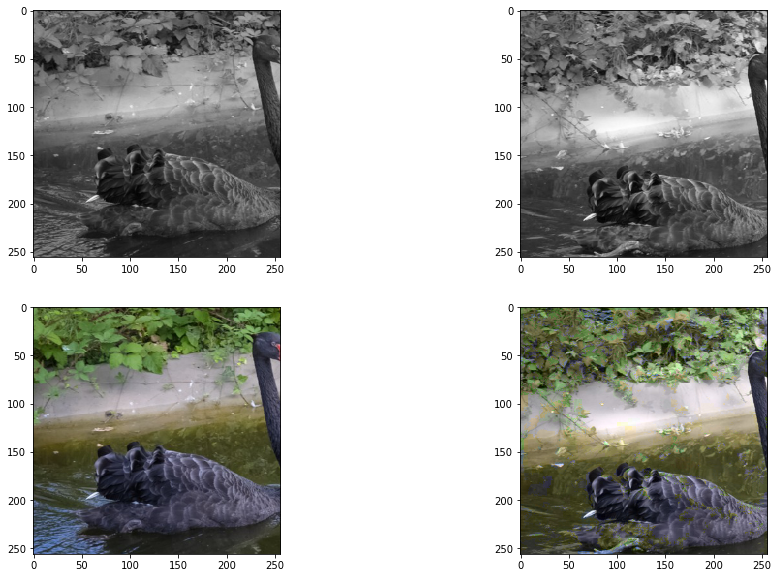

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].imshow(rgb2gray(I1_256))
ax[0, 1].imshow(rgb2gray(Ik_256))
ax[1, 0].imshow(I1_256)
ax[1, 1].imshow(result_Ik)
io.show()

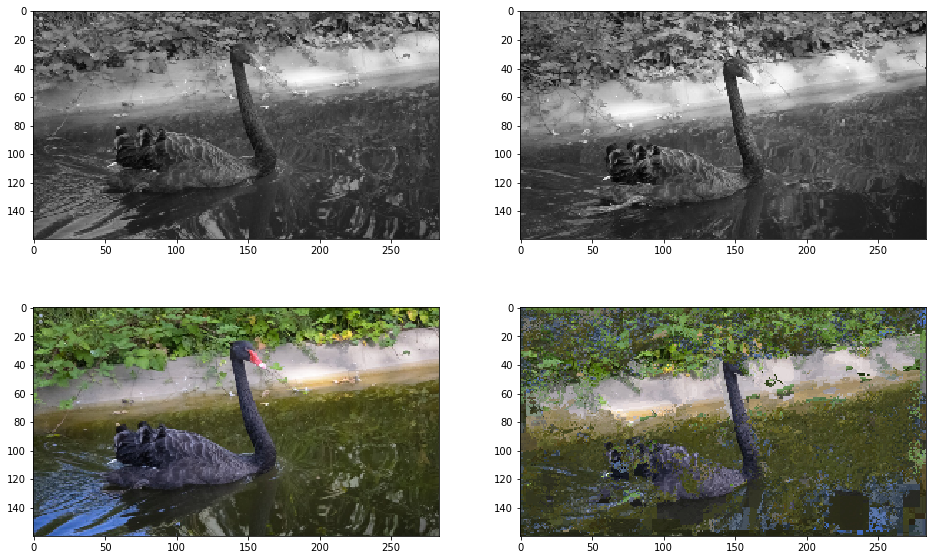

In [178]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].imshow(rgb2gray(I1))
ax[0, 1].imshow(rgb2gray(Ik))
ax[1, 0].imshow(I1)
ax[1, 1].imshow(result_Ik)
plt.show()

In [87]:
result_Ik = global_transferer.forward(rgb2gray(I1), rgb2gray(Ik), I1)

100%|██████████| 160/160 [00:21<00:00,  8.79it/s]


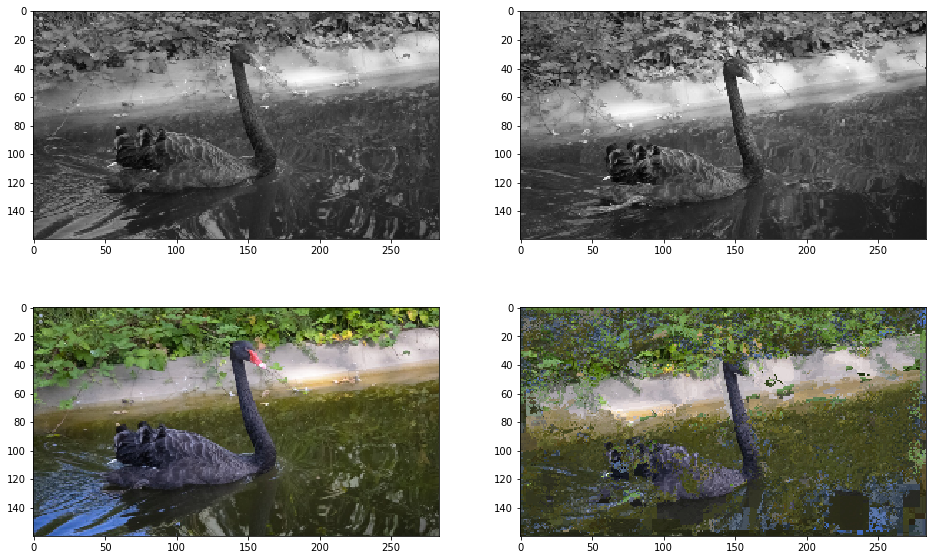

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].imshow(rgb2gray(I1))
ax[0, 1].imshow(rgb2gray(Ik))
ax[1, 0].imshow(I1)
ax[1, 1].imshow(result_Ik)
plt.show()

## Only coarse

In [49]:
global_transferer = GlobalTransferer()

In [50]:
result_Ik = global_transferer.forward(rgb2gray(I1), rgb2gray(Ik), I1)

100%|██████████| 160/160 [00:17<00:00,  9.41it/s]


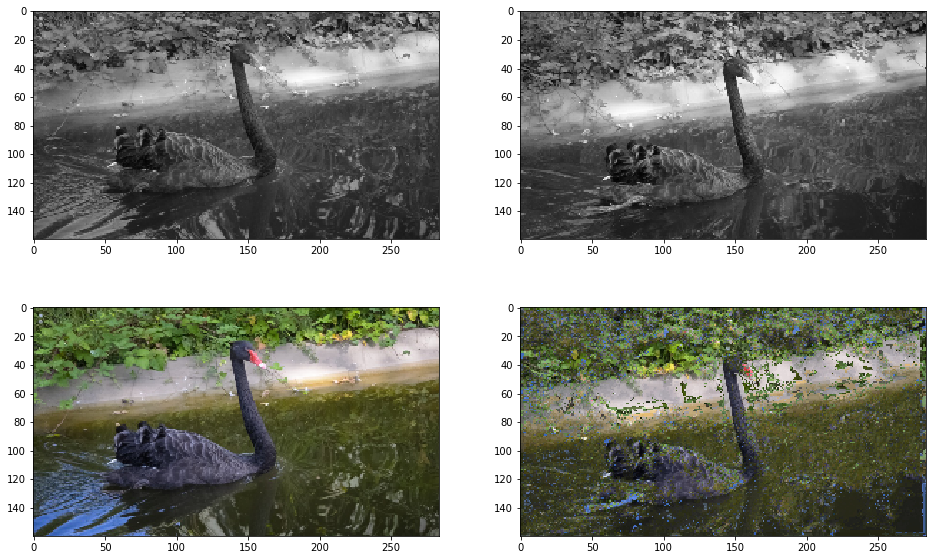

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].imshow(rgb2gray(I1))
ax[0, 1].imshow(rgb2gray(Ik))
ax[1, 0].imshow(I1)
ax[1, 1].imshow(result_Ik)
plt.show()

## Crop 256



## Coarse+fine

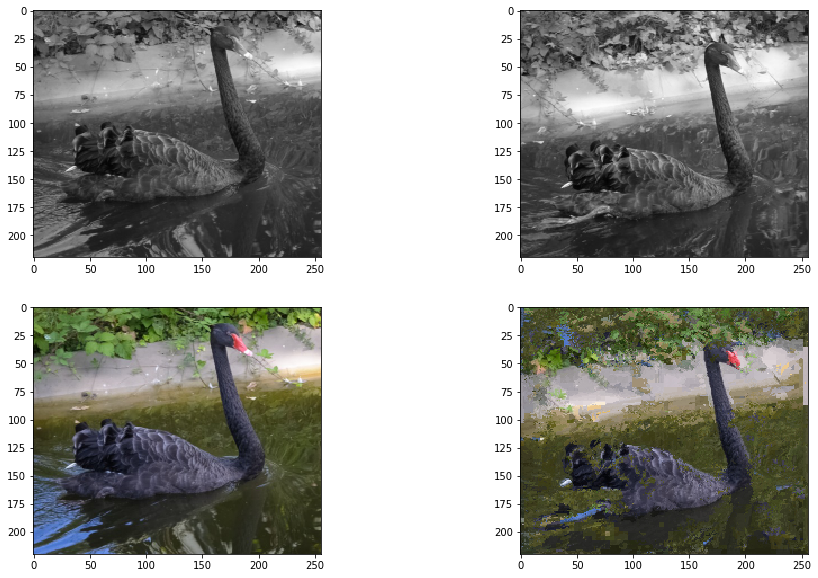

In [197]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].imshow(rgb2gray(I1_256))
ax[0, 1].imshow(rgb2gray(Ik_256))
ax[1, 0].imshow(I1_256)
ax[1, 1].imshow(result_Ik)
plt.show()

## Only coarse

In [202]:
global_transferer = GlobalTransferer()

In [203]:
result_Ik = global_transferer.forward(rgb2gray(I1_256), rgb2gray(Ik_256), I1_256)

100%|██████████| 220/220 [00:51<00:00,  4.53it/s]


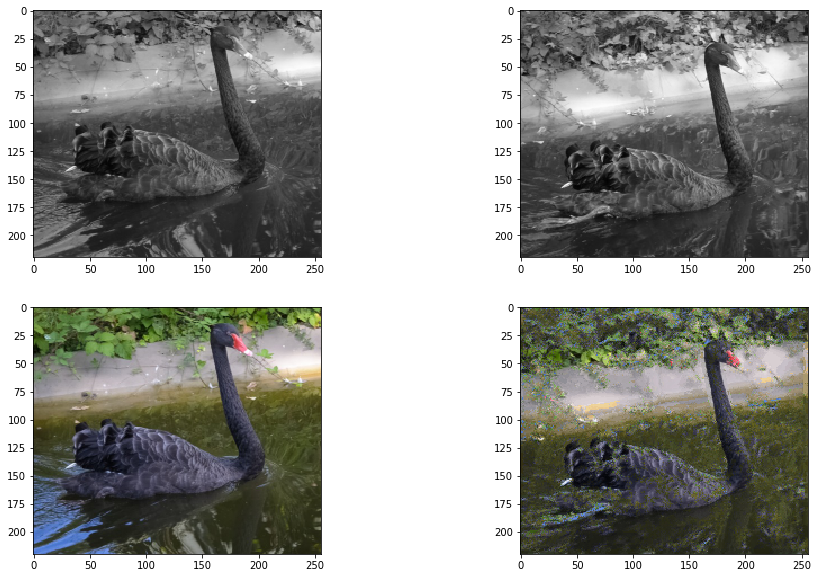

In [204]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].imshow(rgb2gray(I1_256))
ax[0, 1].imshow(rgb2gray(Ik_256))
ax[1, 0].imshow(I1_256)
ax[1, 1].imshow(result_Ik)
plt.show()

## COPY a,b only

In [305]:
result_Ik = global_transferer.forward(rgb2gray(I1_256), rgb2gray(Ik_256), I1_256)


100%|██████████| 220/220 [01:00<00:00,  4.59it/s]

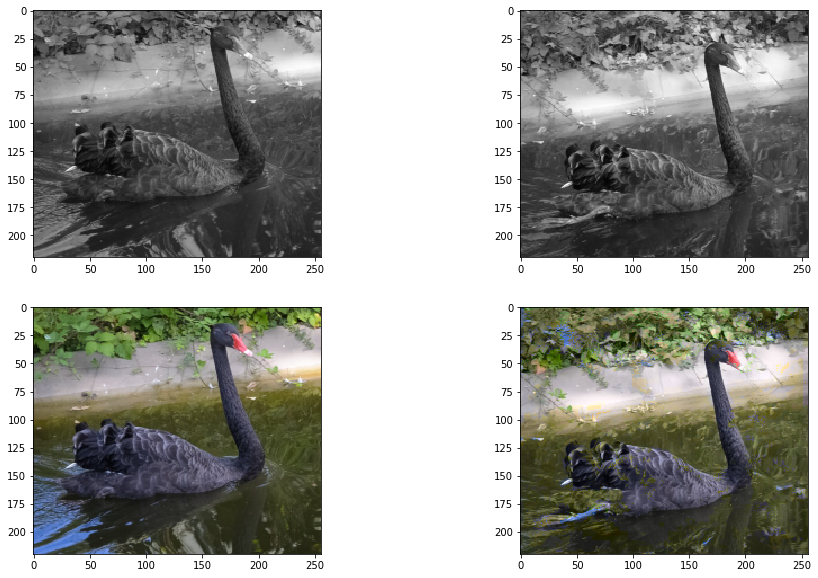

In [306]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].imshow(rgb2gray(I1_256))
ax[0, 1].imshow(rgb2gray(Ik_256))
ax[1, 0].imshow(I1_256)
ax[1, 1].imshow(result_Ik)
plt.show()

In [45]:
refinement_net = RefinementNet()

In [43]:
import torch.hub
model = torch.hub.load("kazuto1011/deeplab-pytorch", "deeplabv2_resnet101", n_classes=182)
model.load_state_dict(torch.load("deeplabv2_resnet101_msc-cocostuff164k-100000.pth"))

Using cache found in /Users/andrejklimkin/.torch/hub/deeplab-pytorch_master

FileNotFoundError: [Errno 2] No such file or directory: 'deeplabv2_resnet101_msc-cocostuff164k-100000.pth'

In [3]:
!ls

Articles          models.ipynb      src
__pycache__       resent.py         subl
datasets          sepconv_anyres.py useful_links


In [8]:
output = model(test_tensor)

In [15]:
output[3].shape

torch.Size([1, 182, 33, 33])